In [1]:
%pylab nbagg
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Theoretical values for the cluster

There are two clusters: the first is a square centered at (0,0) with sides of length 1. The second is a rectangle centered at (10, 2) with a side length of 4 in the x-direction and a length of 2 in the y-direction.
## Radius of gyration

In [2]:
print('Rg1 = {:.2f}'.format((np.sqrt(3/2) * np.sqrt(2 * 4 * 0.5**2 / 5)).round(2)))
print('Rg2 = {:.2f}'.format((np.sqrt(3/2) * np.sqrt((4 + 4 * 2**2) / 5)).round(2)))

Rg1 = 0.77
Rg2 = 2.45


## Eccentricity

For a rectangle, the eccentricity is the square of ratio of the length to the width:

**First cluster**: \\( \left( \frac{1}{1}\right)^2 = 1\\)

**Second cluster** : \\( \left( \frac{4}{2} \right)^2 = 4 \\)

In [24]:
Mcov = np.cov(np.array([[-0.5,-0.5], [-0.5, 0.5], [0.5, -0.5], [0.5, 0.5], [0,0]]), rowvar = 0, bias = 1)
eigs = np.linalg.eigvals(Mcov)
ecc1 = np.max(eigs) / np.min(eigs)
print('ecc1 = {:.2f}'.format(ecc1))

Mcov = np.cov(np.array([[8, 1],      [8, 3],      [12, 1],     [12, 3],    [10,2]]), rowvar = 0, bias = 1)
eigs = np.linalg.eigvals(Mcov)
ecc2 = np.max(eigs) / np.min(eigs)
print('ecc2 = {:.2f}'.format(ecc2))

ecc1 = 1.00
ecc2 = 4.00


# Create the cluster

In [6]:
numPoints = 10 # 2 clusters, 5 points each

# Creates two ground truth clusters, one at (0,0) and another at (10,2)
locs = pd.DataFrame(np.vstack((np.array([[-0.5,-0.5], [-0.5, 0.5], [0.5, -0.5], [0.5, 0.5], [0,0]]),
                               np.array([[8, 1],      [8, 3],      [12, 1],     [12, 3],    [10,2]]))),
                    index = np.arange(0, numPoints),
                    columns = ['x [nm]', 'y [nm]'])
locs = pd.concat([locs, pd.DataFrame(np.zeros(numPoints),
                                    index = np.arange(0, numPoints),
                                    columns = ['frame'])], axis = 1)
locs = pd.concat([locs, pd.DataFrame(columns = ['z [nm]',
                                               'uncertainty [nm]',
                                               'intensity [photon]',
                                               'offset [photon]',
                                               'loglikelihood',
                                               'sigma [nm]',
                                               'cluster_id'],
                                     index = np.arange(0,numPoints))], axis = 1)
locs['z [nm]']             = np.zeros(numPoints)
locs['uncertainty [nm]']   = 10 * np.ones(numPoints) + np.random.randn(numPoints)
locs['intensity [photon]'] = 1000 * np.ones(numPoints) + 100 * np.random.randn(numPoints)
locs['offset [photon]']    = 100 * np.ones(numPoints) + 10 * np.random.randn(numPoints)
locs['loglikelihood']      = 180 * np.ones(numPoints) + 30 * np.random.randn(numPoints)
locs['sigma [nm]']         = 140 * np.ones(numPoints) + 20 * np.random.randn(numPoints)
locs['cluster_id']         = np.vstack((np.zeros((5,1), dtype = np.int16), np.ones((5,1), dtype = np.int16)))
locs.sort_values('frame', inplace = True)
locs.index = np.arange(0, locs.shape[0])

In [8]:
locs

,x [nm],y [nm],frame,z [nm],uncertainty [nm],intensity [photon],offset [photon],loglikelihood,sigma [nm],cluster_id
0,-0.5,-0.5,0,0,10.021870,939.780732,80.219038,161.494040,155.721151,0
1,-0.5,0.5,0,0,9.408785,823.403821,95.393895,209.190424,144.446742,0
2,0.5,-0.5,0,0,10.333715,952.012166,98.656850,243.701264,94.320590,0
3,0.5,0.5,0,0,10.626735,1199.351397,88.166699,218.270532,132.115268,0
4,0.0,0.0,0,0,9.765064,955.466949,96.280657,214.759480,117.792403,0
5,8.0,1.0,0,0,9.876863,1078.617481,104.159719,159.946843,135.698560,1
6,8.0,3.0,0,0,12.155545,989.443663,89.928289,147.019781,155.021342,1
7,12.0,1.0,0,0,10.104455,1034.073165,106.581499,201.612959,126.016791,1
8,12.0,3.0,0,0,8.893435,1050.715863,91.599433,199.450961,122.429116,1
9,10.0,2.0,0,0,10.755980,1105.557538,100.467041,162.443624,151.329622,1


In [9]:
locs.describe()

,x [nm],y [nm],frame,z [nm],uncertainty [nm],intensity [photon],offset [photon],loglikelihood,sigma [nm],cluster_id
count,10.000000,10.000000,10,10,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.000000,1.000000,0,0,10.194245,1012.842278,95.145312,191.788991,133.489158,0.500000
std,5.446712,1.290994,0,0,0.881949,104.540238,7.925582,31.935638,19.326844,0.527046
min,-0.500000,-0.500000,0,0,8.893435,823.403821,80.219038,147.019781,94.320590,0.000000
25%,0.125000,0.125000,0,0,9.793014,952.875862,90.346075,161.731436,123.326034,0.000000
50%,4.250000,0.750000,0,0,10.063162,1011.758414,95.837276,200.531960,133.906914,0.500000
75%,9.500000,1.750000,0,0,10.553480,1071.642077,100.014493,213.367216,149.608902,1.000000
max,12.000000,3.000000,0,0,12.155545,1199.351397,106.581499,243.701264,155.721151,1.000000


<IPython.core.display.Javascript object>


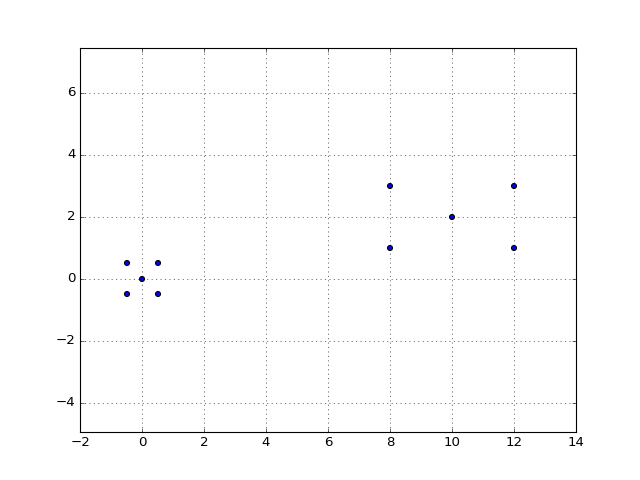

In [15]:
plt.scatter(locs['x [nm]'], locs['y [nm]'])
plt.grid(True)
plt.axis('equal')
plt.show()

In [16]:
locs.to_csv('test_cluster_stats.csv', index = False)